# Jak rychle se stahují snímky z Deky?

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
from astropy.time import Time

Toto jest záznam automaticky pořízené sekvence snímků.

In [51]:
report = """\
03:43:51     LMC19_R_M_000015.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  47 1.37 18786 /   
03:45:52     LMC19_R_M_000016.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  47 1.37 18989 /   
03:47:52     LMC19_R_M_000017.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  47 1.37 19526 /   
03:49:51     LMC45_R_M_000019.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  47 1.38 19063 /   
03:51:53     LMC45_R_M_000020.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  46 1.38 19184 /   
03:53:55     LMC45_R_M_000021.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  46 1.38 19020 /   
03:55:56     LMC19_R_M_000018.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  46 1.38 18646 /   
03:57:57     LMC19_R_M_000019.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  46 1.38 19082 /   
03:59:56     LMC19_R_M_000020.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  46 1.39 18994 /   
04:01:58     LMC45_R_M_000022.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  46 1.39 20034 /   
04:03:59     LMC45_R_M_000023.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  46 1.39 19807 /   
04:06:00     LMC45_R_M_000024.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  46 1.40 19662 /   
04:07:59     LMC19_R_M_000021.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  46 1.40 18876 /   
04:10:00     LMC19_R_M_000022.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  46 1.40 18907 /   
04:12:01     LMC19_R_M_000023.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  45 1.40 18621 /   
04:14:03     LMC45_R_M_000025.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  45 1.41 19963 /   
04:16:03     LMC45_R_M_000026.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  45 1.41 20001 /   
04:18:04     LMC45_R_M_000027.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  45 1.42 20313 /   
04:20:03     LMC19_R_M_000024.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  45 1.41 19177 /   
04:22:04     LMC19_R_M_000025.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  45 1.41 19075 /   
04:24:05     LMC19_R_M_000026.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  45 1.42 18957 /   
04:26:06     LMC45_R_M_000028.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  44 1.43 20642 /   
04:28:05     LMC45_R_M_000029.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  44 1.43 20662 /   
04:30:07     LMC45_R_M_000030.fits                               R       90    0  38.94  05:21:34.790   -69:25:35.06  44 1.44 20786 /   
04:32:08     LMC19_R_M_000027.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  44 1.43 19495 /   
04:34:10     LMC19_R_M_000028.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  44 1.43 19365 /   
04:36:11     LMC19_R_M_000029.fits                               R       90    0  38.94  05:37:10.000   -70:20:08.00  44 1.44 18964 /   
04:38:15     OGLE1350_I_M_000004.fits                            I       90    0  39.09  04:50:14.000   -68:23:06.00  42 1.50 14859 /   
04:40:15     OGLE1350_I_M_000005.fits                            I       90    0  39.09  04:50:14.000   -68:23:06.00  42 1.50 14923 /   
04:42:15     OGLE1350_I_M_000006.fits                            I       90    0  39.09  04:50:14.000   -68:23:06.00  41 1.51 14654 /   
04:44:22     LMC45_R_M_000031.fits                               R       90    0  38.93  05:21:34.790   -69:25:35.06  43 1.46 19868 /   
04:46:25     LMC45_R_M_000032.fits                               R       90    0  38.93  05:21:34.790   -69:25:35.06  43 1.47 19880 /   
04:48:25     LMC45_R_M_000033.fits                               R       90    0  38.93  05:21:34.790   -69:25:35.06  43 1.47 20014 /   
04:50:25     LMC45_R_M_000034.fits                               R       90    0  38.93  05:21:34.790   -69:25:35.06  43 1.47 19313 /   
04:52:30     OGLE14394_I_M_000007.fits                           I       90    0  39.08  05:23:18.000   -69:43:24.00  42 1.48 15592 /   
04:54:31     OGLE14394_I_M_000008.fits                           I       90    0  39.08  05:23:18.000   -69:43:24.00  42 1.48 16261 /   
04:56:33     OGLE14394_I_M_000009.fits                           I       90    0  39.08  05:23:18.000   -69:43:24.00  42 1.49 16400 /   
04:58:34     OGLE1350_I_M_000007.fits                            I       90    0  39.08  04:50:14.000   -68:23:06.00  40 1.55 15239 /   
05:04:38     OGLE1350_I_M_000008.fits                            I       90    0  39.15  04:50:14.000   -68:23:06.00  40 1.57 15209 /   
05:06:39     OGLE1350_I_M_000009.fits                            I       90    0  39.15  04:50:14.000   -68:23:06.00  39 1.57 15417 /   
05:08:39     OGLE1350_I_M_000010.fits                            I       90    0  39.15  04:50:14.000   -68:23:06.00  39 1.58 15134 /   
05:10:48     LMC45_R_M_000035.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  41 1.52 19735 /   
05:12:49     LMC45_R_M_000036.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  41 1.52 19722 /   
05:14:52     LMC45_R_M_000037.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  41 1.53 19696 /   
05:16:54     LMC45_R_M_000038.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  41 1.53 19442 /   
05:18:53     LMC45_R_M_000039.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  41 1.54 19463 /   
05:20:53     LMC45_R_M_000040.fits                               R       90    0  38.99  05:21:34.790   -69:25:35.06  40 1.54 20134 /   
05:23:24     OGLE1350_I_M_000011.fits                            I       90    0  39.14  04:50:14.000   -68:23:06.00  38 1.62 15209 /   
05:25:26     OGLE1350_I_M_000012.fits                            I       90    0  39.14  04:50:14.000   -68:23:06.00  38 1.63 15199 /   
05:27:27     OGLE1350_I_M_000013.fits                            I       90    0  39.14  04:50:14.000   -68:23:06.00  38 1.64 15205 /   
05:33:46     LMC45_R_M_000041.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.57 20040 /   
05:35:48     LMC45_R_M_000042.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.58 19715 /   
05:37:48     LMC45_R_M_000043.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.59 20269 /   
05:39:49     LMC45_R_M_000044.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.59 20390 /   
05:41:49     LMC45_R_M_000045.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.60 19980 /   
05:43:50     LMC45_R_M_000046.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  39 1.60 19845 /   
05:45:51     LMC45_R_M_000047.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.61 20756 /   
05:47:53     LMC45_R_M_000048.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.61 20237 /   
05:49:53     LMC45_R_M_000049.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.62 20311 /   
05:51:54     LMC45_R_M_000050.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.63 20290 /   
05:53:55     LMC45_R_M_000051.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.63 20512 /   
05:55:55     LMC45_R_M_000052.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  38 1.64 20300 /   
05:57:56     LMC45_R_M_000053.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  37 1.64 20171 /   
05:59:57     LMC45_R_M_000054.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  37 1.65 20411 /   
06:01:57     LMC45_R_M_000055.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  37 1.66 20676 /   
06:03:58     LMC45_R_M_000056.fits                               R       90    0  39.03  05:21:34.790   -69:25:35.06  37 1.66 20391 /
"""

Datum pozorování sice známe, ale časy potřebujeme nejprve zjistit.

In [52]:
date = "2016-01-31"
time = []

Ve smyčce rozložíme zprávu po řádcích na věty a ty na jednotlivá slova. První slovo spolu s datumem tvoří okamžik pozorování vyjádřený v Juliánském datování.

In [53]:
for line in report.split("\n")[:-1]:
    time.append( Time( date + "T" + line.split()[0] ).jd )

Od postupných rozdílů dvou okamžiků převedených na jednotky času odečteme dobu expozice.

In [54]:
diff = np.diff(time) * 24 * 60 * 60 - 90

Vykreslíme základní statistiky.

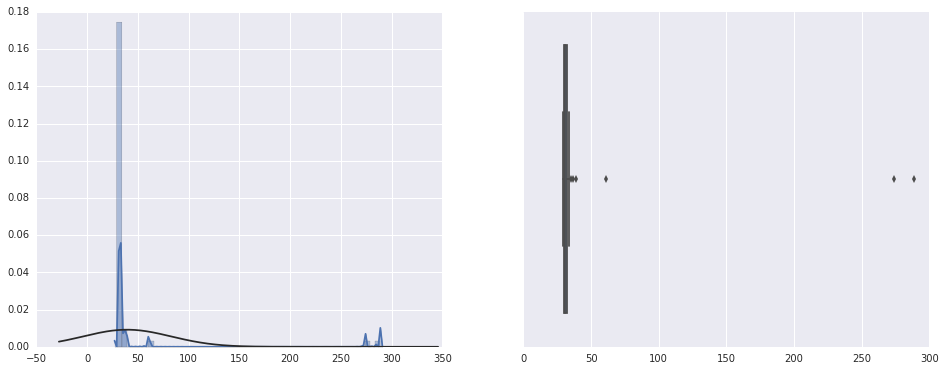

In [55]:
sns.plt.figure(figsize=(16,6))
sns.plt.subplot(121)
sns.distplot(diff, fit=sns.stats.norm, kde_kws={"shade": True});
sns.plt.subplot(122)
sns.boxplot(diff);

A taky si je vypíšeme.

In [56]:
sns.stats.describe(diff)

DescribeResult(nobs=65, minmax=(28.999998271465302, 288.99999618530273), mean=39.338461298208969, variance=1908.9773379435958, skewness=5.372341298268348, kurtosis=27.125184100148466)

Teď už je snad všem jasné, proč magická konstanta připočítaná ke každé expozici musí být právě 42 sekund!